<h1 align="center"> Milestone 2: Data Analysis I </h1>
<h3 align="center"> IST 5520: Data Science and Machine Learning with Python, 2022 Fall </h3>

## Outline
#### 1. Introduction
#### 2. Data Source and Collection
#### 3. Data Manipulation
#### 4. Data Summarization and Visualization

## 1. Introduction:

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019. In this report we have tried to visualize different regions of NYC with respect to price and their popularity. We have also tried to deal with categorical data to better utilize it for future predictions. We performed a descriptive and exploratory analysis of the data, in order to understand how the phenomena of each variable behave individually and transversely, in addition to generate hypotheses useful for future decision-making.

## 2. Data Source and Collection:
Available data that is being used in this report is extracted from official website of Airbnb for the year 2019 for NYC

In [1]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats

In [2]:
#importing data
nyc_data = pd.read_csv('AB_NYC_2019.csv')

In [3]:
# summary of NYC data
nyc_data.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

Through .info() command, we can find that there are 16 different columns(variables). We can find that the shape of data is 48895*16, and the data types of each column. Also, we can understand which column is categorial data, which dtype is object

In [4]:
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
nyc_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We can see that most of the missing data are in name, host_name, last review and review_per_month variables

### 3. Data Summarization and Visualization

Before we bulid the model (predictive analytics), we want to do some explanatory (descriptive) analytics, and try to find some interesting things from NYC data. We want to explore the relationship among price, count, and categorical data, especially for neighbourhood, neighbour_group and room_type. This relationship will be represented using countplot, boxplot, scatter plot etc. Some of the graphs were not depicting a clear picture of the scenario so a bit of data manipulation has also been done here. 

#### Neighbourhood Group vs Count

In [6]:
nyc_data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Text(0.5, 1.0, 'Neighbourhood Group')

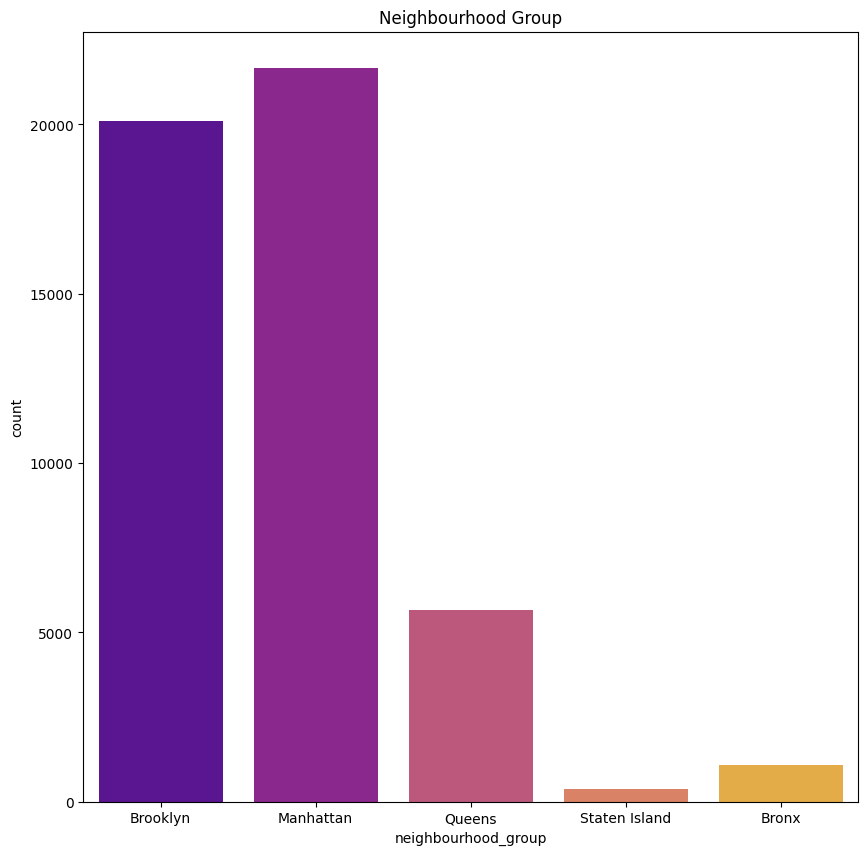

In [7]:
sns.countplot(x=nyc_data['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

Not surprisingly, Manhattan and Brooklyn are the most popular areas in the New York because of their tourist attractions. So Manhattan is the most popular tourist attraction followed by Brooklyn and Queens.

#### Room Type vs Count

Text(0.5, 1.0, 'Room Type')

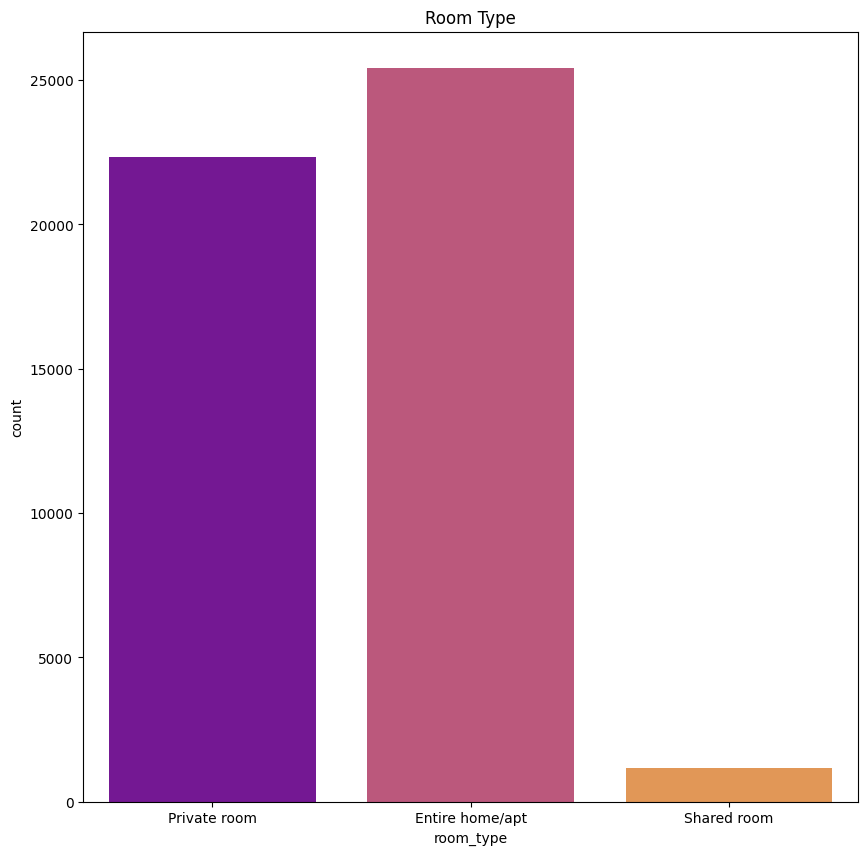

In [8]:
sns.countplot(x=nyc_data['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Room Type')

The above graph clearly shows a large number of poeple prefer to live in an entire home/apartment. Also, very few people prefer to live in shared room.

#### Neighbourhood Group vs Price (Finding outliers)

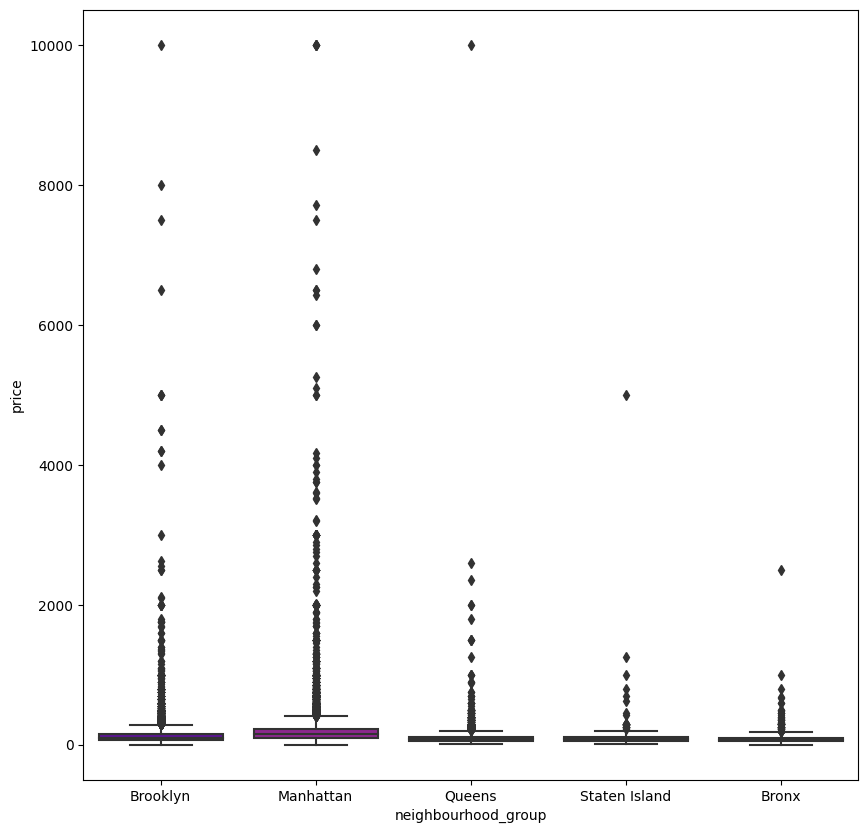

In [9]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=nyc_data, x='neighbourhood_group',y='price',palette='plasma')

Above graph does not depict true picture of differernt neighnorhood versus price. According to this graph most the poeple try to get the apartment into same price bracket but making this argument a conclusion would not be a reasonable thing. So, it is essential to remove outliers.

#### Neighbourhood Group  vs Price (<400 USD) - removing outliers

As mentioned earlier to find the descriptive relationship of neighbourhood and price, we need to remove outliers. After doing some hit and trial for many values, 400 USD seemed to be the value which gives a good picture between these two variables. In other words, we found that setting up threshold for price to be 400 is a good balance between data amount and outliers. So it was decided to drop all the observations which are paying more than 400 USD.

In [10]:
nyc_data['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [11]:
df_try = nyc_data[nyc_data['price'] < 400]
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_try, x='neighbourhood_group',y='price',palette='plasma')

After removing the outliers, above graph shows clear picture of different neighbourhoods versus price. Manhattan is the place where average rent for Airbnb is the highest followed by Brooklyn and Queens. One very interesting observation is that though the price for the area of Manhattan and Brooklyn is highest but people still want to go to these places.

In [12]:
df_try['price'].describe()

count    46907.000000
mean       125.092843
std         76.022504
min          0.000000
25%         66.000000
50%        100.000000
75%        165.000000
max        399.000000
Name: price, dtype: float64

From above details we can see that by only removing around 2000 observation, which were outliers, data makes much more sense and it is easy to understand using graphical method.

#### Longitude & Latitude vs Price 

Up to this point we have explored differernt neighbourhood groups like Manhattan and Brooklyn versus their price ranges but it is essential to explore small neighborhoods. According to the analysis there are 219 neighbourhoods and all of them are categorical data. So handling that much of catergorical data to create a relationship with price using dummies method is not useful. Another way to do explanatory analysis is by using geographical graphs using lattitude and Longitudes. 

In [13]:
len(df_try['neighbourhood'].unique())

219

In [14]:
plt.figure(figsize=(12, 8))
plt.scatter(df_try.longitude, df_try.latitude, c=df_try.price, cmap='jet', alpha=0.4)

plt.legend(['Price'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')

cbar = plt.colorbar()
cbar.set_label('Price')

Using above analysis method we can see differernt neighbourhoods and their prices. Here again, we can clearly see that neighbourhoods of Manhattan and Brooklyn have relatively high prices as compared to other locations.

#### Visualizing the distribution

Using pairplot method we can understand the best set of features to explain a relationship between two variables or to form the most seperated clusters. This function creates a plot in a pairwise manner to show the relationship in a dataset.

In [15]:
df_try2 = nyc_data[nyc_data['price'] < 1000]
df_try2.price.hist(edgecolor="black", linewidth=1.2, figsize=(5, 5))
plt.xlabel('Price')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

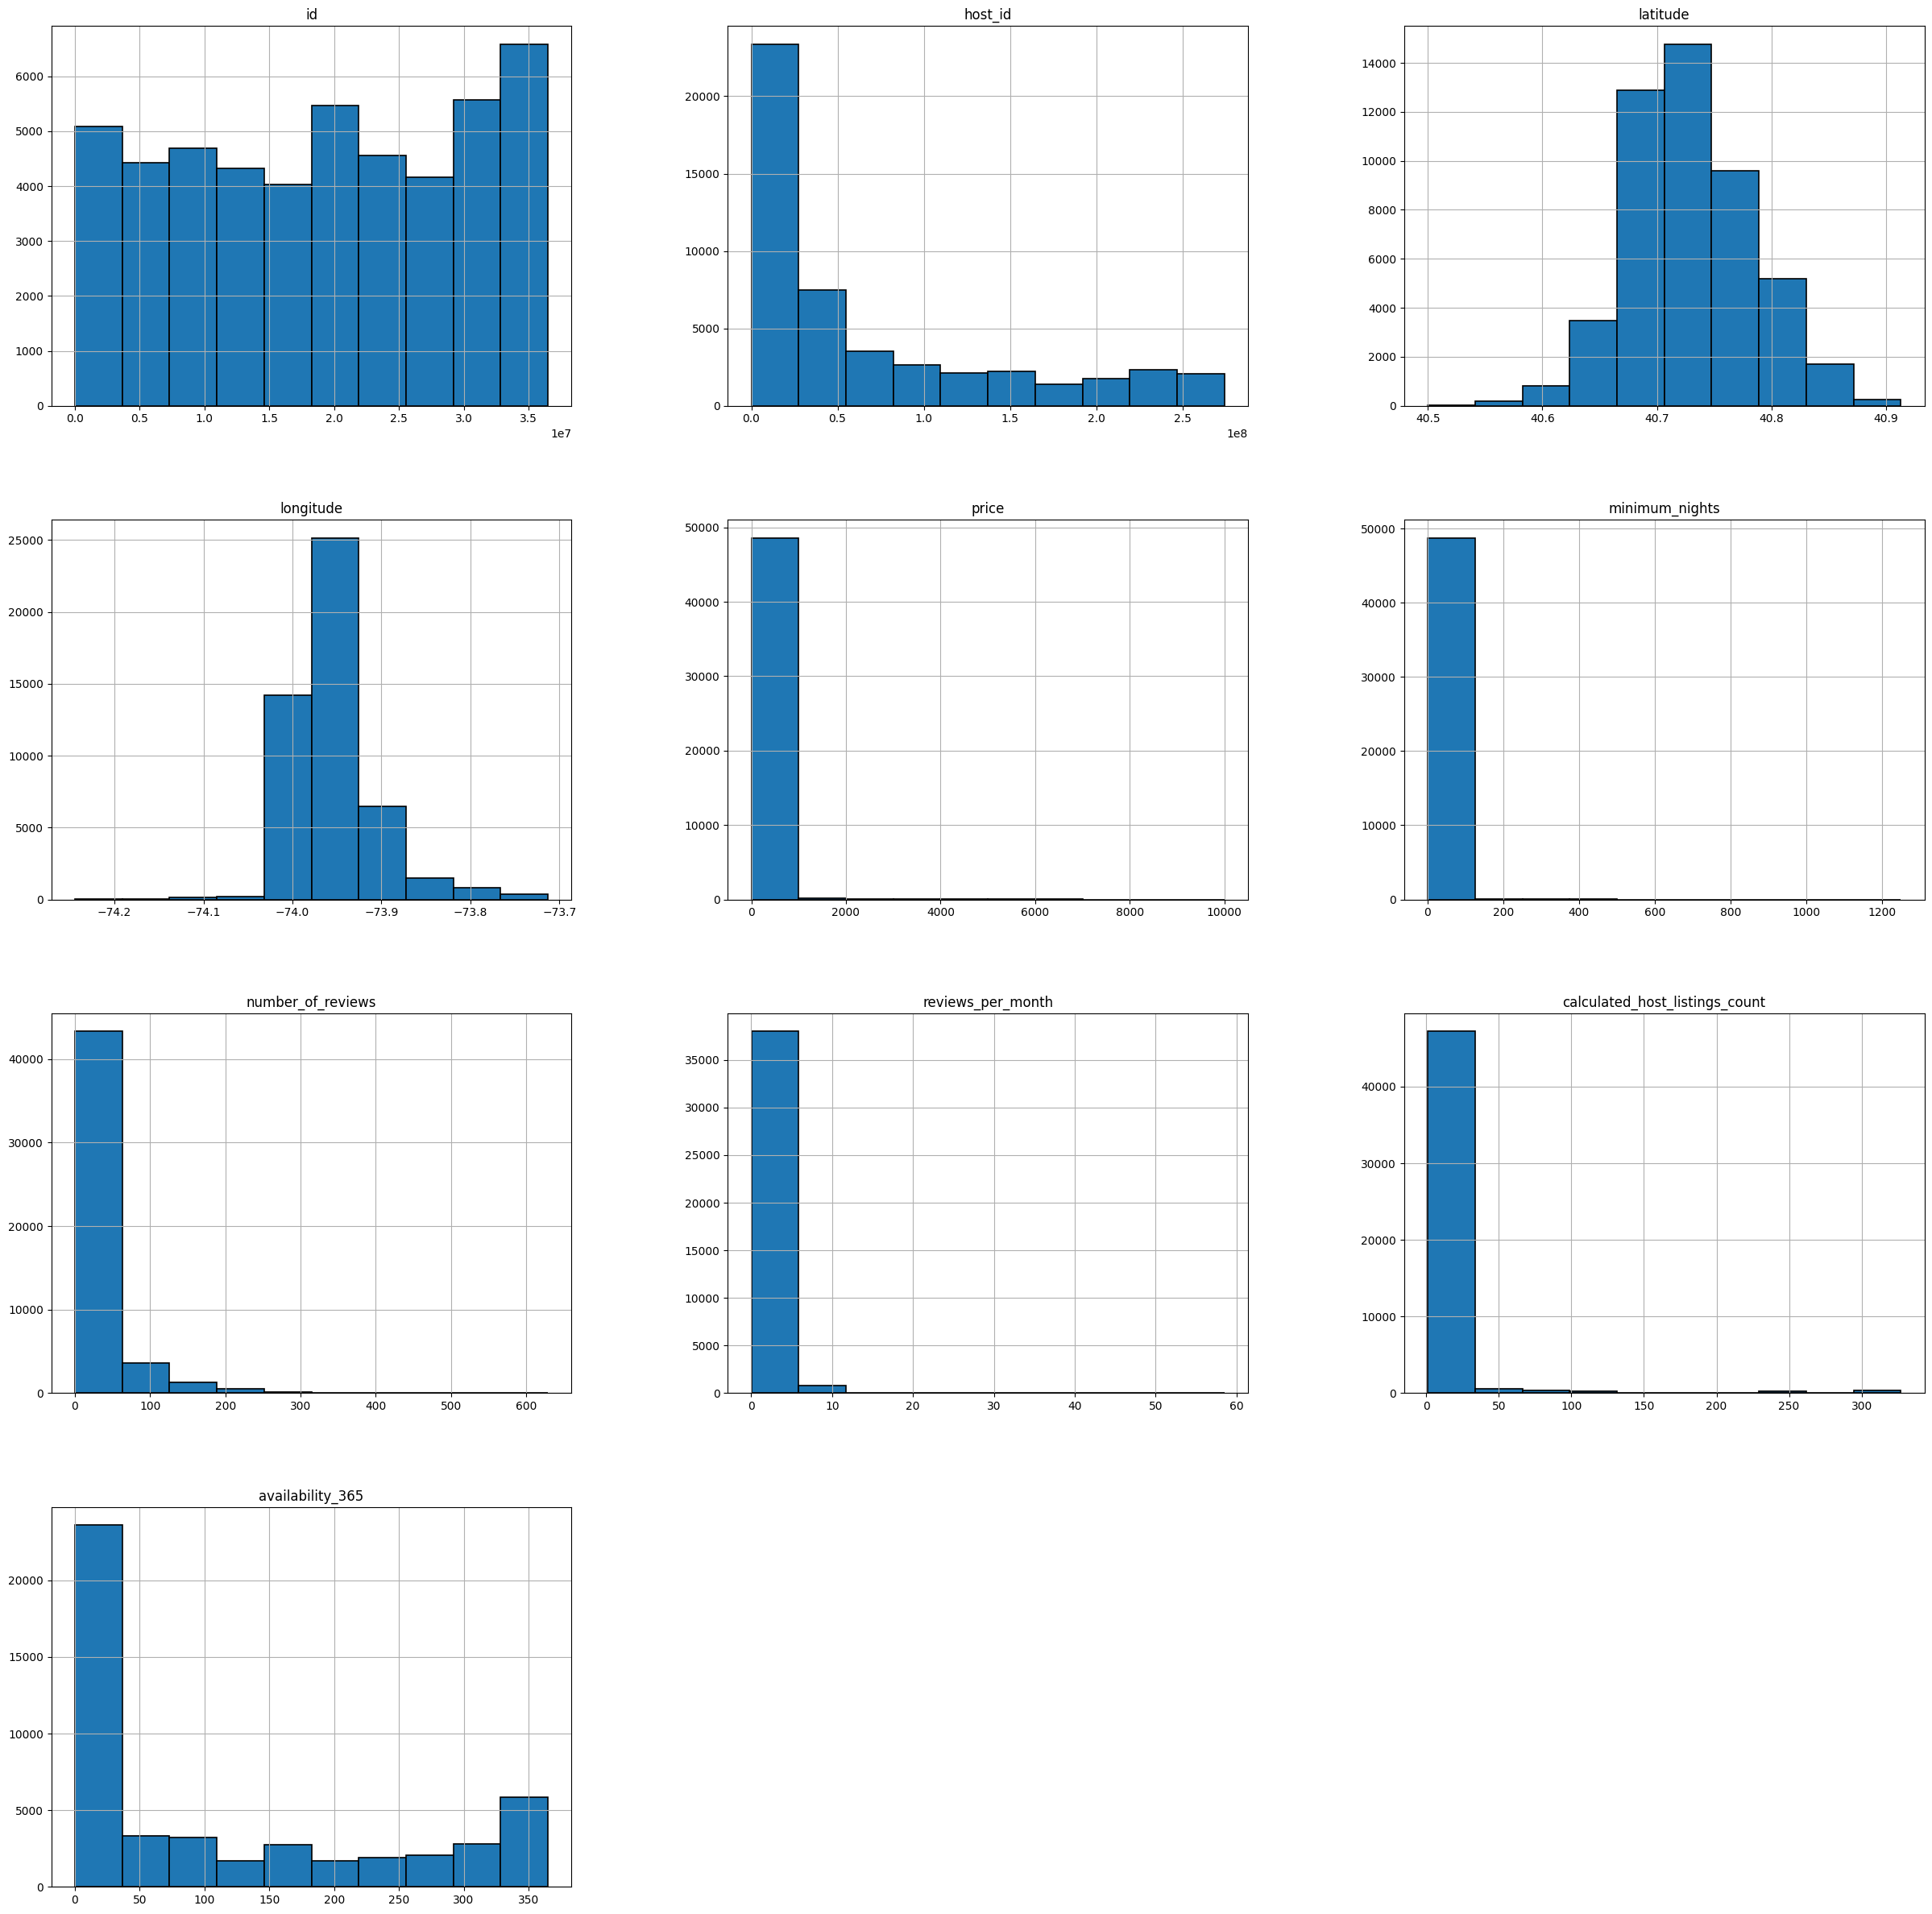

In [16]:
nyc_data.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));

<Figure size 3000x3000 with 0 Axes>

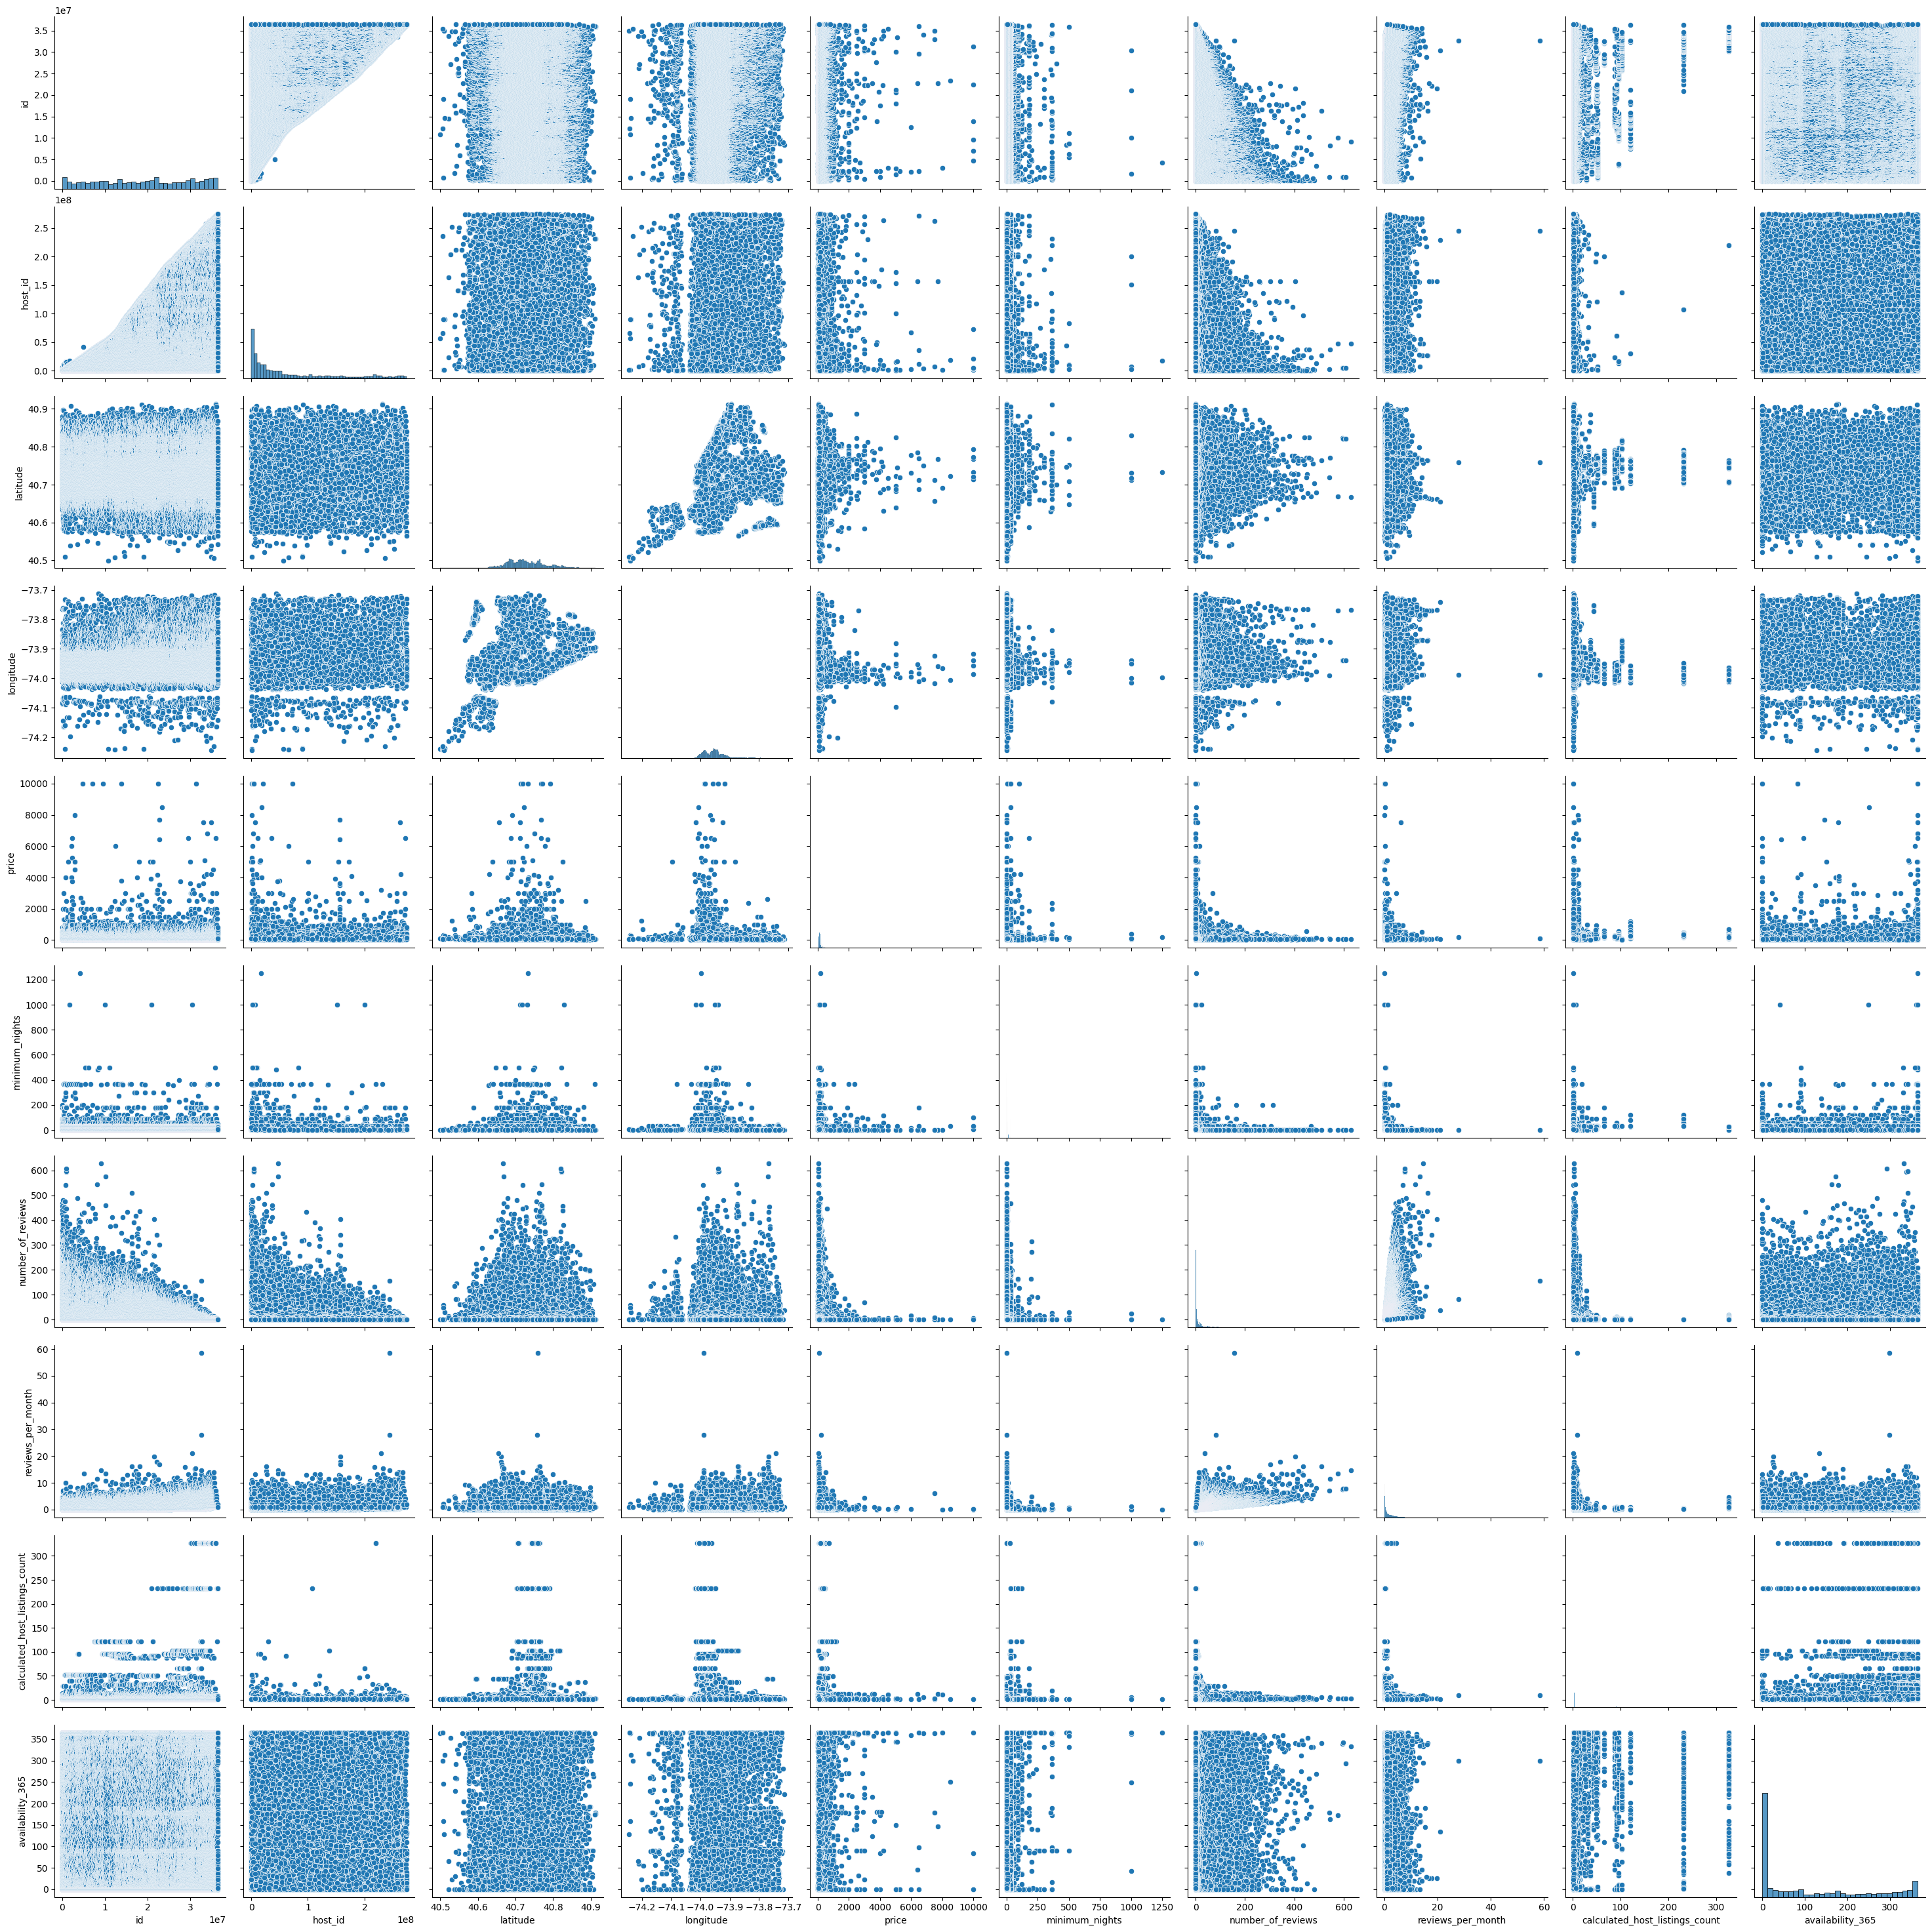

In [17]:
plt.figure(figsize=(30, 30))
sns.pairplot(nyc_data, height=3, diag_kind="hist")

<br>Based on distribution plot and pairplot, we can obtain the following information<br/>
<br>1. Latitude and longitude have a normal distribution which shows that most of the hosts are concetrated in specific area.<br/>
<br>2. Reviews_per_month has a lot of outlayers this could be because of the missing values.<br/>
<br>3. For variable Availability_365, the most of the hosts are not available all the year.<br/>
<br>4. Most of the prices are under 400 (this was another reason outliers were droped after this values). <br/>

#### Neighbourhoods using Fun WorldCLoud

Fun Worldcloud is an interesting package where certain category is highlited more if that value is repeated more times. Using this method we can represent famous neighbourhoods. Bigger the font size is more popular that neighbourhood is.

In [18]:
from wordcloud import WordCloud

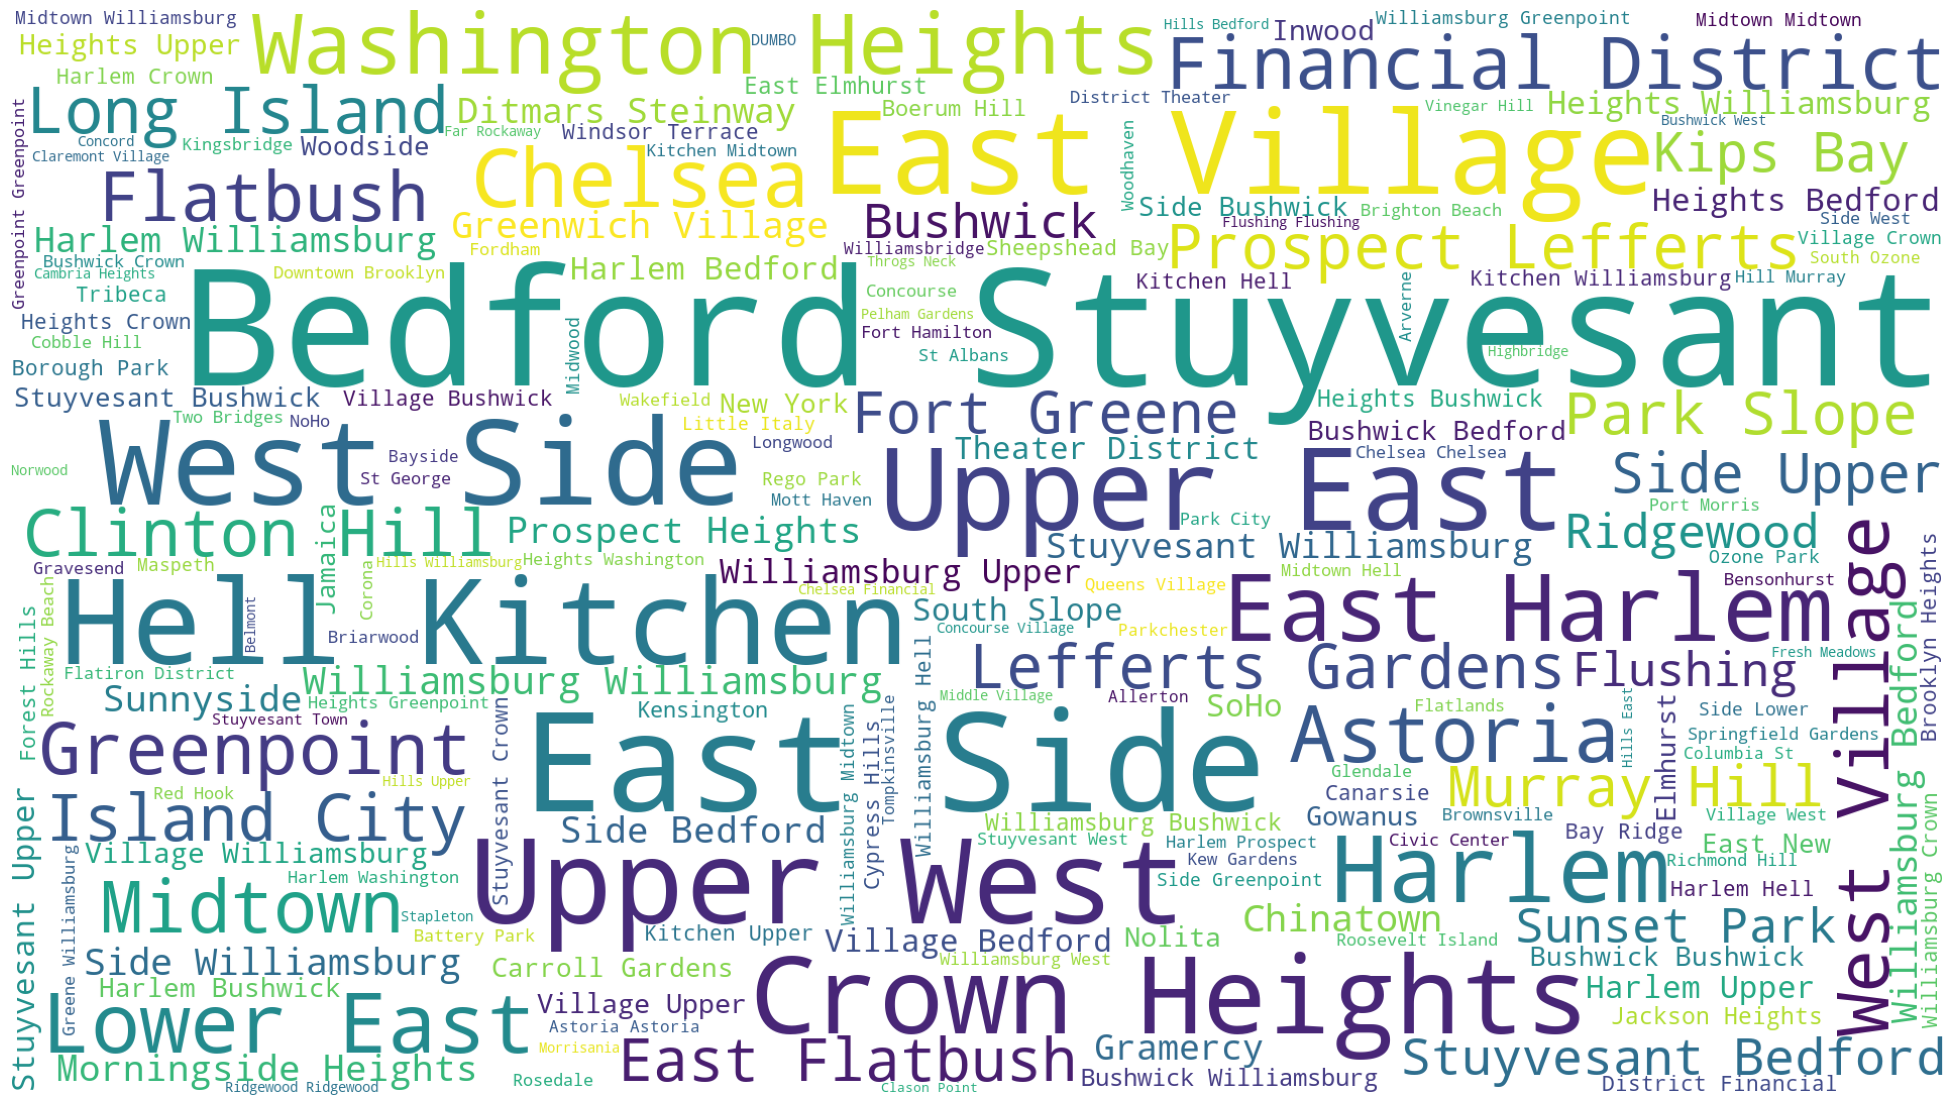

In [19]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                        background_color='white',
                        width=1920,
                        height=1080
                         ).generate(" ".join(df_try.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

Looking at the above picture, it is evident that Bedford  Stuyvesant and East Village are one of the most famous neighbourhoods. These neighbourhoods, which mentioned earlier are also from Brooklyn and Manhattan respectively. 

### 4. Data Manipulation

<br>According to above discussion, following required steps are performed to make our dataset ready for future requirements: <br/>

<br> 1. Dropping nominal variables like id, host_id, neighbourhood, and last review are perfomed as they do not play any role for data correlation.   <br/>
<br> 2. Dummies have been assigned to neighbourhood_group and room_type because these have only five and three categories respectively which can be handled easily. <br/>
<br> 3. We dealt our data for missing values by dropping those observations. There are two reason that we thought it is better to drop values rather than impute it with mean or median values. a) Missing values are not too much in quantity b) Median or Mean value can skew our data set which consequestly can predict wrong value. <br/>
<br> 4. Prices above 400 USD observations are removed based on our previous discussion. <br/>
<br> 5. Normalize the data after cleaning to avoid effect from extreme value. <br/>
<br> 6. Used correlation to check multicollinarity. <br/>
<br> 7. Saved new cleansed data to csv file. <br/>

#### Drop unnecessary column

In [20]:
df_try.drop(['id'], axis=1, inplace=True)
df_try.drop(['name', 'host_id', 'host_name', 'neighbourhood', 'last_review'],axis=1, inplace=True)

C:\Users\utccc\AppData\Local\Temp\ipykernel_28164\672560104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_try.drop(['id'], axis=1, inplace=True)
C:\Users\utccc\AppData\Local\Temp\ipykernel_28164\672560104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_try.drop(['name', 'host_id', 'host_name', 'neighbourhood', 'last_review'],axis=1, inplace=True)


In [21]:
df_try.head()

neighbourhood_group  latitude  longitude        room_type  price  \
0            Brooklyn  40.64749  -73.97237     Private room    149   
1           Manhattan  40.75362  -73.98377  Entire home/apt    225   
2           Manhattan  40.80902  -73.94190     Private room    150   
3            Brooklyn  40.68514  -73.95976  Entire home/apt     89   
4           Manhattan  40.79851  -73.94399  Entire home/apt     80   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               1                  9               0.21   
1               1                 45               0.38   
2               3                  0                NaN   
3               1                270               4.64   
4              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [22]:
df_try.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46907 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             46907 non-null  object 
 1   latitude                        46907 non-null  float64
 2   longitude                       46907 non-null  float64
 3   room_type                       46907 non-null  object 
 4   price                           46907 non-null  int64  
 5   minimum_nights                  46907 non-null  int64  
 6   number_of_reviews               46907 non-null  int64  
 7   reviews_per_month               37583 non-null  float64
 8   calculated_host_listings_count  46907 non-null  int64  
 9   availability_365                46907 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.9+ MB


#### Drop nan value & check the information of post processing data

In [23]:
# Dropping nan value
df_final = df_try.dropna()

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37583 entries, 0 to 48852
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             37583 non-null  object 
 1   latitude                        37583 non-null  float64
 2   longitude                       37583 non-null  float64
 3   room_type                       37583 non-null  object 
 4   price                           37583 non-null  int64  
 5   minimum_nights                  37583 non-null  int64  
 6   number_of_reviews               37583 non-null  int64  
 7   reviews_per_month               37583 non-null  float64
 8   calculated_host_listings_count  37583 non-null  int64  
 9   availability_365                37583 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.2+ MB


Till this point we have dropped around 12000 observations including outliers. 

In [25]:
#creating seperate dataframe for variables which contain categorical data
categorical_col = ['neighbourhood_group','room_type']

In [26]:
#Assigning dummies for categorical data.
cat_data = pd.get_dummies(df_final, columns = categorical_col)

In [27]:
cat_data.head()

latitude  longitude  price  minimum_nights  number_of_reviews  \
0  40.64749  -73.97237    149               1                  9   
1  40.75362  -73.98377    225               1                 45   
3  40.68514  -73.95976     89               1                270   
4  40.79851  -73.94399     80              10                  9   
5  40.74767  -73.97500    200               3                 74   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
3               4.64                               1               194   
4               0.10                               1                 0   
5               0.59                               1               129   

   neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                          0                             1   
1                          0                             0   
3                          0                             1   
4                          0                             0   
5                          0                             0   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                              0                           0   
1                              1                           0   
3                              0                           0   
4                              1                           0   
5                              1                           0   

   neighbourhood_group_Staten Island  room_type_Entire home/apt  \
0                                  0                          0   
1                                  0                          1   
3                                  0                          1   
4                                  0                          1   
5                                  0                          1   

   room_type_Private room  room_type_Shared room  
0                       1                      0  
1                       0                      0  
3                       0                      0  
4                       0                      0  
5                       0                      0

In [28]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37583 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   latitude                           37583 non-null  float64
 1   longitude                          37583 non-null  float64
 2   price                              37583 non-null  int64  
 3   minimum_nights                     37583 non-null  int64  
 4   number_of_reviews                  37583 non-null  int64  
 5   reviews_per_month                  37583 non-null  float64
 6   calculated_host_listings_count     37583 non-null  int64  
 7   availability_365                   37583 non-null  int64  
 8   neighbourhood_group_Bronx          37583 non-null  uint8  
 9   neighbourhood_group_Brooklyn       37583 non-null  uint8  
 10  neighbourhood_group_Manhattan      37583 non-null  uint8  
 11  neighbourhood_group_Queens         37583 non-null  uin

In the above info, categorical variable changed to dummies and attached to original data frame can be seen.

In [29]:
cat_data.describe()

latitude     longitude         price  minimum_nights  \
count  37583.000000  37583.000000  37583.000000    37583.000000   
mean      40.727983    -73.950332    122.559961        5.867307   
std        0.055438      0.046890     73.367796       17.406176   
min       40.506410    -74.244420      0.000000        1.000000   
25%       40.688300    -73.981810     66.000000        1.000000   
50%       40.721200    -73.954110    100.000000        2.000000   
75%       40.763270    -73.933990    160.000000        4.000000   
max       40.913060    -73.712990    399.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       37583.000000       37583.000000                    37583.000000   
mean           29.634702           1.377934                        4.933960   
std            48.581280           1.688573                       24.940853   
min             1.000000           0.010000                        1.000000   
25%             3.000000           0.190000                        1.000000   
50%            10.000000           0.720000                        1.000000   
75%            34.000000           2.020000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  neighbourhood_group_Bronx  \
count      37583.000000               37583.000000   
mean         112.609691                   0.023149   
std          128.768485                   0.150378   
min            0.000000                   0.000000   
25%            0.000000                   0.000000   
50%           52.000000                   0.000000   
75%          222.000000                   0.000000   
max          365.000000                   1.000000   

       neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
count                  37583.000000                   37583.000000   
mean                       0.429157                       0.418567   
std                        0.494962                       0.493331   
min                        0.000000                       0.000000   
25%                        0.000000                       0.000000   
50%                        0.000000                       0.000000   
75%                        1.000000                       1.000000   
max                        1.000000                       1.000000   

       neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
count                37583.000000                       37583.000000   
mean                     0.120826                           0.008302   
std                      0.325929                           0.090735   
min                      0.000000                           0.000000   
25%                      0.000000                           0.000000   
50%                      0.000000                           0.000000   
75%                      0.000000                           0.000000   
max                      1.000000                           1.000000   

       room_type_Entire home/apt  room_type_Private room  \
count               37583.000000            37583.000000   
mean                    0.510577                0.467099   
std                     0.499895                0.498923   
min                     0.000000                0.000000   
25%                     0.000000                0.000000   
50%                     1.000000                0.000000   
75%                     1.000000                1.000000   
max                     1.000000                1.000000   

       room_type_Shared room  
count           37583.000000  
mean                0.022324  
std                 0.147737  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

It can be seen that all the data has been converted to quantitative data for future manipulation.

In [30]:
#Normalization of data
cat_data_n =  (cat_data-np.min(cat_data))/(np.max(cat_data)-np.min(cat_data))

C:\Users\utccc\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\utccc\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [31]:
cat_data_n.describe()

latitude     longitude         price  minimum_nights  \
count  37583.000000  37583.000000  37583.000000    37583.000000   
mean       0.544875      0.553390      0.307168        0.003897   
std        0.136330      0.088234      0.183879        0.013936   
min        0.000000      0.000000      0.000000        0.000000   
25%        0.447289      0.494157      0.165414        0.000000   
50%        0.528194      0.546281      0.250627        0.000801   
75%        0.631649      0.584141      0.401003        0.002402   
max        1.000000      1.000000      1.000000        1.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       37583.000000       37583.000000                    37583.000000   
mean            0.045597           0.023387                        0.012067   
std             0.077359           0.028869                        0.076506   
min             0.000000           0.000000                        0.000000   
25%             0.003185           0.003077                        0.000000   
50%             0.014331           0.012139                        0.000000   
75%             0.052548           0.034365                        0.003067   
max             1.000000           1.000000                        1.000000   

       availability_365  neighbourhood_group_Bronx  \
count      37583.000000               37583.000000   
mean           0.308520                   0.023149   
std            0.352790                   0.150378   
min            0.000000                   0.000000   
25%            0.000000                   0.000000   
50%            0.142466                   0.000000   
75%            0.608219                   0.000000   
max            1.000000                   1.000000   

       neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
count                  37583.000000                   37583.000000   
mean                       0.429157                       0.418567   
std                        0.494962                       0.493331   
min                        0.000000                       0.000000   
25%                        0.000000                       0.000000   
50%                        0.000000                       0.000000   
75%                        1.000000                       1.000000   
max                        1.000000                       1.000000   

       neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
count                37583.000000                       37583.000000   
mean                     0.120826                           0.008302   
std                      0.325929                           0.090735   
min                      0.000000                           0.000000   
25%                      0.000000                           0.000000   
50%                      0.000000                           0.000000   
75%                      0.000000                           0.000000   
max                      1.000000                           1.000000   

       room_type_Entire home/apt  room_type_Private room  \
count               37583.000000            37583.000000   
mean                    0.510577                0.467099   
std                     0.499895                0.498923   
min                     0.000000                0.000000   
25%                     0.000000                0.000000   
50%                     1.000000                0.000000   
75%                     1.000000                1.000000   
max                     1.000000                1.000000   

       room_type_Shared room  
count           37583.000000  
mean                0.022324  
std                 0.147737  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

#### Creating Correlation Matrix without Dummies

In [35]:
sns.set(font_scale=2)
plt.figure(figsize=(40, 30))
sns.heatmap(df_final.corr(), annot=True)

C:\Users\utccc\AppData\Local\Temp\ipykernel_28164\20659915.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(), annot=True)


<AxesSubplot: >

#### Creating Correlation Matrix with Dummies

In [36]:
sns.set(font_scale=2)
plt.figure(figsize=(40, 30))
sns.heatmap(cat_data_n.corr(), annot=True)

<AxesSubplot: >

In [38]:
#Eigen vector of a correlation matrix.
# After get dummies

multicollinearity, V=np.linalg.eig(cat_data_n.corr())
multicollinearity

array([ 2.90421249e+00,  2.28943681e+00,  1.83290330e+00,  1.54280502e+00,
        2.07270927e-01,  2.70978858e-01,  4.09153516e-01,  4.52019623e-01,
        1.24312828e+00,  9.23732911e-01,  1.11632891e+00,  1.07419642e+00,
        1.02206919e+00,  7.11763750e-01,  2.48955814e-15, -8.72136224e-16])

In the end, it can be concluded that eigen values are small which shows that multicolinearity is minimal if not eliminated at all.

In [40]:
#### Export data after data cleaning
cat_data_n.to_csv('Aftercleaning.csv')